# Lab - NLP Week 6

## Lab Summary:

In this lab we will be discussing Neural Networks.

We will build neural networks to classify data and use hyperparameter tuning to make our models better.

## Lab Goal:
Upon completion of this lab, the student should be able to:
<ul>
    <li> design a <b>neural network</b> and use it for a classification problem </li>
    <li> apply a neural network to predict labels from the <b>MNIST</b> dataset</li>
    <li> optimize our neural network by applying different <b>activation functions</b> </li>
    <li> optimize our neural network by applying different <b>learning rates</b></li>
</ul>

## Import Packages and Classes (Initial)

In this lab we will be using the following libraries:
<ol>
    <li> NLTK </li>
    <li> Pandas </li>
    <li> Matplotlib </li>
    <li> Keras </li>
</ol>


# Neural Networks

Neural networks are multi-layer networks of neurons that we use to classify data and make predictions. 

Below is a diagram of a simple neural network with one input layer, one output layer and one hidden layer of neurons.

![Image](NeuralNetworkImage.jpg)

Image Source: https://ars.els-cdn.com/content/image/3-s2.0-B9780128115299000017-f01-07-9780128115299.jpg

Keras is an open-source software library that provides a Python interface for artificial neural networks. 

To create our Neural Network, we will use the scikit-learn library to create a sample dataset.  The dataset contains 10 columns and 2 target classes. 

We will train a classifier to learn to distinguish between 2 classes based on characteristics of the input data.

In [32]:
! pip install scikit-learn pandas matplotlib nltk keras tensorflow pydot graphviz

# Import libraries.
from sklearn.datasets import make_classification
import pandas as pd
import os
import zipfile

# Check if digits directory exists
if not os.path.exists('digits') and os.path.exists('digits.zip'):
    # Unzip the file
    with zipfile.ZipFile('digits.zip', 'r') as zip_ref:
        zip_ref.extractall()



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
#Create the sample dataset
X, y = make_classification(n_samples = 500,
                                       n_features = 10,
                                       n_informative = 5,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.2, .3])

In [3]:
#View the dataset
print("Dataset: ");
print(pd.DataFrame(X, columns=["Feature 1", 
                               "Feature 2", 
                               "Feature 3", 
                               "Feature 4", 
                               "Feature 5",
                               "Feature 6", 
                               "Feature 7", 
                               "Feature 8", 
                               "Feature 9", 
                               "Feature 10"]).head())

Dataset: 
   Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0   2.341852   0.365934   0.710251  -0.517336   2.332981   1.727669   
1   0.536563   1.100119   0.298338   0.898708  -2.377827   0.509724   
2   0.401721  -0.164234   0.217854  -2.570287  -2.220818  -1.738395   
3  -0.895954   1.376794  -1.752664   1.205520  -3.021406   0.279939   
4   0.600818   3.458622   1.078552   0.128180  -2.034895  -0.263984   

   Feature 7  Feature 8  Feature 9  Feature 10  
0  -1.191113   0.448949   0.995514    1.166615  
1   1.019802   2.989876   0.611036   -0.118794  
2  -0.030097   0.836261   0.682971   -0.104392  
3   1.486704   1.011087  -0.749264   -2.120411  
4   0.049000   3.136936   0.312726   -0.780774  


### Split into train and test set



In [4]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2, 
    random_state = 42)

### Design the Neural Network

Note: the following libraries from conda are required for some steps below, if using Anaconda / Jupyter Lab:
- pydot
- pydotplus
- graphviz

In [5]:
# Import the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
# from keras.utils.vis_utils import plot_model # May work in Colab. May not work in Jupyter Lab.
from tensorflow.keras.utils import plot_model # May work in Jupyter Lab. May not work in Colab.


In [6]:
# Initialize a Neural Network from keras.models
model = Sequential()

Our Neural Network Design:

- 1 Input layer
- 1 Hidden layers
- 1 Output layer
- 1 Compile layer

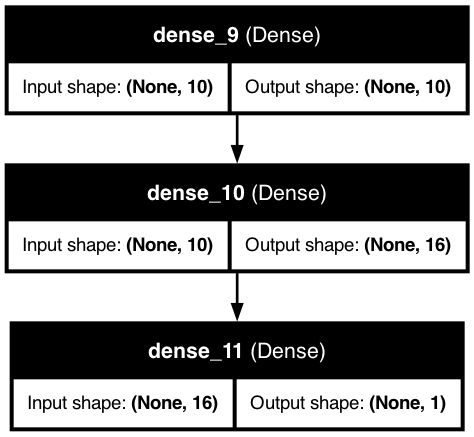

In [11]:
# Import Input layer
from tensorflow.keras.layers import Input

# Create an input layer
inputs = Input(shape=(10,))  # Since our generated data has 10 features

# Initialize the Sequential model
model = Sequential([
    inputs,  # Add the input layer first
    Dense(units=10,  # The "units" parameter is the number of outputs
          kernel_initializer='uniform',
          activation='relu'),  
    
    # Add a hidden layer
    Dense(units=16,  # This layer will have 16 outputs
          kernel_initializer='uniform',
          activation='relu'),  # We'll learn more about activation functions a little later in this lab
    
    # Adding the output layer. This is the last layer in the network
    Dense(units=1,  # Since we are classifying a row into one of two columns, our output generates a single output
          kernel_initializer='uniform',
          activation='sigmoid')
])

# Compiling the ANN. This step puts it all together.
# The last layer includes a loss function and the metric that will be used to determine the quality of the network: "accuracy."
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# We can see what the steps are by using the "plot_model" function.
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, dpi=96)

In [13]:
# Fit the Neural Network to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose=0) # verbose = 0 prevents a message for each epoch.

In [14]:
# How accurate is our model at predicting the correct classifications?
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', accuracy)

Test accuracy: 0.8399999737739563


# MNIST Dataset

We create a neural network that trains on a famous dataset of images to predict other images.

Reference: https://pypi.org/project/python-mnist/

In [15]:
# Import the mnist dataset.
from keras.datasets import mnist

In [16]:
# Create train/test objects from it.
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [17]:
# Check how large each dataset is:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


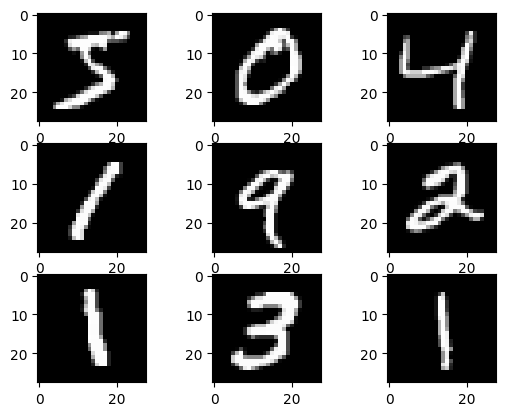

In [18]:
# Let's look at the first 9 images from mnist:
from matplotlib import pyplot
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# How is this useful?

We can use a Neural Network to classify brand new images into numeric digits.

Following similar steps as above, create a neural network with:
1. One input layer with size=784 (28x28).
2. Two hidden layers with 32 neurons each.
3. An output layer that can classify into 10 classes with softmax activation function.
4. A compile step with optimizer = 'adam', loss function = 'categorical_crossentropy', and metrics = ['accuracy'].

In [20]:
# The steps below create a neural network with an input layer, 
# 2 hidden layers with 32 neurons each, and
# an output layer that can classify into 10 classes.

# Import Input layer
from tensorflow.keras.layers import Input

# Create an input layer for the flattened MNIST images (28x28 = 784 pixels)
inputs = Input(shape=(784,))

# Initialize the Sequential model with a list of layers
model2 = Sequential([
    inputs,  # Add the input layer first
    Dense(units=10, kernel_initializer='uniform', activation='relu'),
    Dense(units=32, kernel_initializer='uniform', activation='relu'),
    Dense(units=32, kernel_initializer='uniform', activation='relu'),
    Dense(units=10, kernel_initializer='uniform', activation='softmax')  # 10 units for 10 classes
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### One-hot encoding

We will need to convert train_y and test_y into one-hot encoded format.

<b>One-hot encoding</b> represents categorical labels as vectors. Example:

<code>train_y = [0, 1, 4, 9, 2]</code>

<code>train_y_cat = [
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # 0
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # 1
  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # 4
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # 9
  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]   # 2
]</code>

The <code>softmax</code> layer outputs a vector of 10 probabilities, one for each class.

The <code>categorical_crossentropy</code> loss function compares the predicted probability vector to a one-hot encoded true label.

In [21]:
from tensorflow.keras.utils import to_categorical

# Apply one-hot encoding to our categories:
train_y_cat = to_categorical(train_y, num_classes=10)
test_y_cat = to_categorical(test_y, num_classes=10)

In [22]:
# Flatten each 28 x 28 pixel image into a single 784-pixel vector.
# Standardize the values between 0 and 1 by dividing by 255 (0-255 is the potential value of each of the 784 greyscale pixels).
train_X_flat = train_X.reshape(-1, 784).astype('float32') / 255
test_X_flat = test_X.reshape(-1, 784).astype('float32') / 255

In [23]:
# Train the neural network using training data.
model2.fit(train_X_flat, train_y_cat, 
           epochs=10,  # Go through the entire training set 10 times (cycles). More is better (to a certain point)
           batch_size=128,  # Training data divided into 128 samples each. Model updates its weights after each batch.
           validation_split=0.1)  # 10% of the training data will be held out during training to evaluate how it is doing. Prevents overfitting.

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - accuracy: 0.5962 - loss: 1.1411 - val_accuracy: 0.7510 - val_loss: 0.7017
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - accuracy: 0.5962 - loss: 1.1411 - val_accuracy: 0.7510 - val_loss: 0.7017
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.7882 - loss: 0.6611 - val_accuracy: 0.8655 - val_loss: 0.4553
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.7882 - loss: 0.6611 - val_accuracy: 0.8655 - val_loss: 0.4553
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.8653 - loss: 0.4571 - val_accuracy: 0.8975 - val_loss: 0.3590
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.8653 - loss: 0.4571 - val_accuracy: 0.8975 - val_loss: 0.3590
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.8885 - loss: 0.3875 - val_accuracy: 0.9110 - val_loss: 0.3153
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.8885 - loss: 0.3875 - 

# Compare Model Results to Labeled Data

Our dataset contains labeled values for each numeral.  

Using accuracy_score and classification_report from scikit-learn, we can see how well our model predicts numeric values against the labels.

In [24]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [25]:
# Perform predictions using the flattened Test data against the Labels (Y values).
y_pred_probs = model2.predict(test_X_flat)  # shape: (num_samples, 784)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step


In [26]:
# Calculate Accuracy and also perform a Classification Report which gives other details about model performance.
accuracy = accuracy_score(test_y, y_pred)

print("Accuracy Score:", accuracy)
print("Classification Report:")
print(classification_report(test_y, y_pred))

Accuracy Score: 0.9212
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       980
           1       0.96      0.98      0.97      1135
           2       0.90      0.94      0.92      1032
           3       0.89      0.88      0.89      1010
           4       0.94      0.94      0.94       982
           5       0.91      0.84      0.87       892
           6       0.92      0.96      0.94       958
           7       0.95      0.91      0.93      1028
           8       0.87      0.90      0.89       974
           9       0.90      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



---

# Predict one image value.

Select one of the images from the test sample (which was not used in training).

View the image and see what you think it is without assistance.

See whether the model will correctly predict its value. Does the prediction match your expectation?

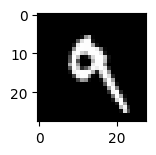

In [33]:
# Test the neural network with a sample from the test data.

import numpy as np

# Choose one sample and visually inspect it.
sample_index = 7
pyplot.subplot(330 + 1 + sample_index)
pyplot.imshow(test_X[sample_index], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [34]:
# Reshape the test sample into 784-length vector. 
sample = test_X[sample_index].reshape(1, 784)

# Predict
prediction = model2.predict(sample)
predicted_label = np.argmax(prediction)

print("Predicted label:", predicted_label)
print("True label:", test_y[sample_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted label: 9
True label: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted label: 9
True label: 9


## Predict self-drawn numerals

The data files for this unit include an image for each digit which was hand-drawn by one of the course developers.

These steps will demonstrate how to use a pre-trained neural network, built in the previous steps, to predict what numeral is in the image.

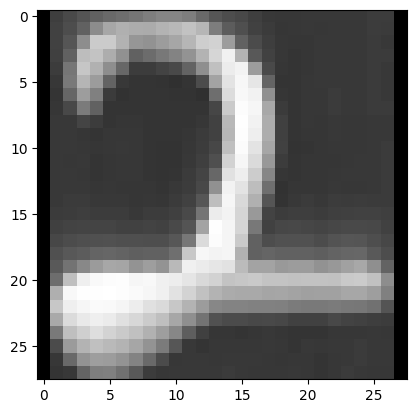

In [35]:
# Import image and plotting libraries.
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

# Open one of the image files, and display it.
img = Image.open("digits/digit_2.png")
plt.imshow(img, cmap='gray')
plt.show()

In [36]:
# To use our image in our model, we must convert it into a numeric vector.  
# We normalize the image by dividing 255 into it (255 different greyscale values). This will result in values from 0 to 1.
img_array = np.array(img).astype('float32') / 255.0
img_input = img_array.reshape(1, 784)  # ready for model.predict()

In [37]:
# Use the image as input to our model and make a prediction about what digit is shown.
prediction = model2.predict(img_input)
predicted_digit = np.argmax(prediction)
print("Predicted digit:", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted digit: 2


---

# Practice

Import one of the other images and use the model above to predict what numeral it is.  Feel free to re-use some of the code created above.

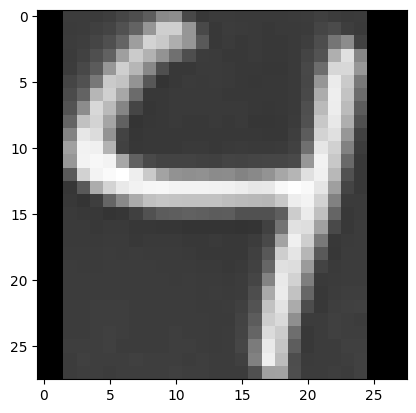

In [38]:
# Open one of the image files, and display it.
# Make sure to pick a different image.

img2 = Image.open("digits/digit_4.png")
plt.imshow(img2, cmap='gray')
plt.show()

In [39]:
# To use our image in our model, we must convert it into a numeric vector.  
# Normalize the image by dividing 255 into it (255 different greyscale values). This will result in values from 0 to 1.
img2_array = np.array(img2).astype('float32') / 255.0
img2_input = img2_array.reshape(1, 784)  # ready for model.predict()

In [40]:
# Use the image as input to our model and make a prediction about what digit is shown.
img2_prediction = model2.predict(img2_input)
img2_predicted_digit = np.argmax(img2_prediction)
print("Predicted digit:", img2_predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted digit: 5


# Practice Part 2 / discuss in class

Is the predicted value of the image always correct?

What are some ways you can improve the accuracy of the prediction?

---

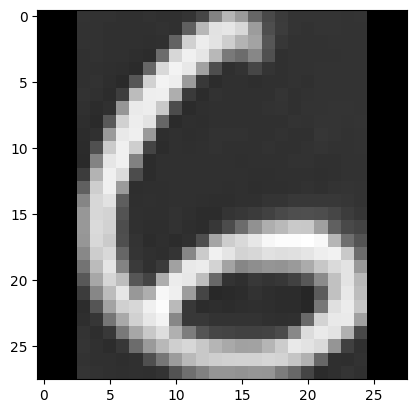

In [41]:
# Open one of the image files, and display it.
# Make sure to pick a different image.
img = Image.open("digits/digit_6.png")
plt.imshow(img, cmap='gray')
plt.show()

In [42]:
# To use our image in our model, we must convert it into a numeric vector.  
# We normalize the image by dividing 255 into it (255 different greyscale values). This will result in values from 0 to 1.
img_array = np.array(img).astype('float32') / 255.0
img_input = img_array.reshape(1, 784)  # ready for model.predict()

In [43]:
# Use the image as input to our model and make a prediction about what digit is shown.
prediction = model2.predict(img_input)
predicted_digit = np.argmax(prediction)
print("Predicted digit:", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted digit: 3


# Activation functions

- A multiplier that helps artificial neural networks learn complex patterns in data 

- Input into the activation function is W*x + b.
    - W: weights
    - x: input vector 
    - b: bias (unrestricted with potentially high magnitude)

- Neural network allow for non-linear models.

![Image](ActivationFunctions.png)

Image Source: https://miro.medium.com/max/1200/1*ZafDv3VUm60Eh10OeJu1vw.png

Reference: https://www.youtube.com/watch?v=aircAruvnKk

## Hidden Layer Activation Functions
- <b>relu</b>: <i>most common</i>. Results in either 0 or 1 - send the result to the next level or don't. Helps avoid vanishing gradients.
- <b>tanh</b>: smooth and bounded between -1 and 1
- <b>swish or mish</b>: advanced - self-gated, smoother than ReLU, sometimes better accuracy
- <b>leaky_relu, elu (Expontential Linear Function)</b>: variants of ReLU that handle negative inputs better

## Output Activation Functions
- <b>softmax</b>: <i>most common</i>. converts output logits into a probability distribution over the count of output units. Best when using <b>categorical_crossentropy</b> loss. Most interpretable for classification.
- <b>sigmoid</b>: only for binary or one-vs-all classification. Outputs between 0 and 1 for each output neuron independently. Requires <b>binary_crossentropy</b> or custom loss
- <b>linear</b>: Outputs raw logitcs (unnormalized scores). Only makes sense if you apply softmax yourself during loss calculation. Used in <b>custom or research settings</b>.

## Activation Function Practice

Create a new version of our Neural Network used for MNIST. Use different hidden layer Activation Functions:
- leaky_relu
- elu

#### <b>elu</b> (exponential linear function)

In [50]:
# The steps below create a neural network with an input layer, 
# 2 hidden layers with 32 neurons each, and
# an output layer that can classify into 10 classes.

# Change Activation Function of hidden layers to elu and see how it performs.
from tensorflow.keras.layers import ELU, Input

# Create an input layer
inputs = Input(shape=(784,))

model_elu = Sequential([
    inputs,
    Dense(10, kernel_initializer='uniform', activation='relu'),
    Dense(32, kernel_initializer='uniform'),
    ELU(alpha=1.0),  # alpha = scale of negative slope
    Dense(32, kernel_initializer='uniform'),
    ELU(alpha=1.0),  # alpha = scale of negative slope
    Dense(10, kernel_initializer='uniform', activation='softmax')  # 10 units for 10 classes
])

model_elu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model_elu.fit(train_X_flat, train_y_cat, 
           epochs=10,  # Go through the entire training set 10 times (cycles). More is better (to a certain point)
           batch_size=128,  # Training data divided into 128 samples each. Model updates its weights after each batch.
           validation_split=0.1)  # 10% of the training data will be held out during training to evaluate how it is doing. Prevents overfitting.

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.5420 - loss: 1.2199 - val_accuracy: 0.7973 - val_loss: 0.6294
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.5420 - loss: 1.2199 - val_accuracy: 0.7973 - val_loss: 0.6294
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.8247 - loss: 0.5762 - val_accuracy: 0.8855 - val_loss: 0.3774
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.8247 - loss: 0.5762 - val_accuracy: 0.8855 - val_loss: 0.3774
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.8746 - loss: 0.4144 - val_accuracy: 0.8977 - val_loss: 0.3232
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.8746 - loss: 0.4144 - val_accuracy: 0.8977 - val_loss: 0.3232
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9016 - loss: 0.3282 - val_accuracy: 0.9235 - val_loss: 0.2472
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9016 - loss: 0.3282 - 

In [52]:
# Perform predictions using the flattened Test data against the Labels (Y values).
y_pred_probs = model_elu.predict(test_X_flat)  # shape: (num_samples, 784)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step


In [53]:
# Calculate Accuracy and also perform a Classification Report which gives other details about model performance.
accuracy = accuracy_score(test_y, y_pred)

print("Accuracy Score:", accuracy)
print("Classification Report:")
print(classification_report(test_y, y_pred))

Accuracy Score: 0.932
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.92      0.92      1032
           3       0.89      0.92      0.91      1010
           4       0.95      0.92      0.94       982
           5       0.93      0.86      0.89       892
           6       0.95      0.95      0.95       958
           7       0.93      0.94      0.94      1028
           8       0.91      0.90      0.91       974
           9       0.90      0.93      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



#### <b>leaky_relu</b>

In [55]:
# The steps below create a neural network with an input layer, 
# 2 hidden layers with 32 neurons each, and
# an output layer that can classify into 10 classes.

# Change Activation Function of hidden layers to LeakyReLU
from tensorflow.keras.layers import LeakyReLU, Input

# Create an input layer
inputs = Input(shape=(784,))

model_leakyrelu = Sequential([
    inputs,
    Dense(10, kernel_initializer='uniform', activation='relu'),
    Dense(32, kernel_initializer='uniform'),
    LeakyReLU(negative_slope=0.01),  # Using negative_slope instead of alpha
    Dense(32, kernel_initializer='uniform'),
    LeakyReLU(negative_slope=0.01),  # Using negative_slope instead of alpha
    Dense(10, kernel_initializer='uniform', activation='softmax')  # 10 units for 10 classes
])

model_leakyrelu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
model_leakyrelu.fit(train_X_flat, train_y_cat, 
           epochs=10,  # Go through the entire training set 10 times (cycles). More is better (to a certain point)
           batch_size=128,  # Training data divided into 128 samples each. Model updates its weights after each batch.
           validation_split=0.1)  # 10% of the training data will be held out during training to evaluate how it is doing. Prevents overfitting.

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.6417 - loss: 1.0523 - val_accuracy: 0.8587 - val_loss: 0.5019
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.6417 - loss: 1.0523 - val_accuracy: 0.8587 - val_loss: 0.5019
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.8470 - loss: 0.5348 - val_accuracy: 0.8828 - val_loss: 0.4133
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.8470 - loss: 0.5348 - val_accuracy: 0.8828 - val_loss: 0.4133
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.8683 - loss: 0.4672 - val_accuracy: 0.8988 - val_loss: 0.3640
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.8683 - loss: 0.4672 - val_accuracy: 0.8988 - val_loss: 0.3640
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.8798 - loss: 0.4281 - val_accuracy: 0.9042 - val_loss: 0.3382
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.8798 - loss: 0.4281 - 

In [57]:
# Perform predictions using the flattened Test data against the Labels (Y values).
y_pred_probs = model_leakyrelu.predict(test_X_flat)  # shape: (num_samples, 784)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate Accuracy and also perform a Classification Report which gives other details about model performance.
accuracy = accuracy_score(test_y, y_pred)

print("Accuracy Score:", accuracy)
print("Classification Report:")
print(classification_report(test_y, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step
Accuracy Score: 0.9248
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.89      0.91      1032
           3       0.92      0.90      0.91      1010
           4       0.92      0.95      0.93       982
           5       0.94      0.84      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.93      0.93      1028
           8       0.87      0.92      0.89       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000

Accuracy Score: 0.9248
Classification Report:
              precision    recall  f1-score   support

        

## Bottom line - activation functions

<b>relu</b> is the most common for hidden layers for our MNIST dataset, <i>but other functions exist.</i>

<b>softmax</b> is the good option for the output layer.

---

# Learning Rate and Optimizers

- The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated 

- A too-small learning rate may result in a long training process that could get stuck 

- A too-large learning rate may result in not obtaining optimal parameter values

![Image](LearningRate.png)

Image Source: https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png

# Optimizers

### Adam - Adaptive Moment Estimation

Keeps track of both:
- Moving average of gradients
- Moving average of Squared gradients

May overfit without regularization

Works well with minimal tuning

### Others

#### SGD: Stochastic Gradient Descent
#### RMS: Root Mean Square Propagation
#### Adagrad: Adaptive Gradient Algorithm

In [59]:
# Let's build another neural network and test with our MNIST dataset.

# We'll use the adam optimizer with LR set to 0.001.
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

lrate = 0.001 # Default. Also try 0.0001, 0.005, or 0.0005

# Create an input layer
inputs = Input(shape=(784,))

model_lr = Sequential([
    inputs,
    Dense(10, kernel_initializer='uniform', activation='relu'),
    Dense(32, kernel_initializer='uniform', activation='relu'),
    Dense(32, kernel_initializer='uniform', activation='relu'),
    Dense(10, kernel_initializer='uniform', activation='softmax')
])

optimizer = Adam(learning_rate=lrate) 
model_lr.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
model_lr.fit(train_X_flat, train_y_cat, 
           epochs=10,  # Go through the entire training set 10 times (cycles). More is better (to a certain point)
           batch_size=128,  # Training data divided into 128 samples each. Model updates its weights after each batch.
           validation_split=0.1)  # 10% of the training data will be held out during training to evaluate how it is doing. Prevents overfitting.

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.6320 - loss: 1.0812 - val_accuracy: 0.8455 - val_loss: 0.5174
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.6320 - loss: 1.0812 - val_accuracy: 0.8455 - val_loss: 0.5174
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.8342 - loss: 0.5545 - val_accuracy: 0.8772 - val_loss: 0.4265
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.8342 - loss: 0.5545 - val_accuracy: 0.8772 - val_loss: 0.4265
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.8563 - loss: 0.4879 - val_accuracy: 0.8898 - val_loss: 0.3810
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.8563 - loss: 0.4879 - val_accuracy: 0.8898 - val_loss: 0.3810
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.8701 - loss: 0.4435 - val_accuracy: 0.8953 - val_loss: 0.3537
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.8701 - loss: 0.4435 - 

In [61]:
# How does this perform?
# Pretty well though not as well as the default Adam optimizer.

# Perform predictions using the flattened Test data against the Labels (Y values).
y_pred_probs = model_lr.predict(test_X_flat)  # shape: (num_samples, 784)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate Accuracy and also perform a Classification Report which gives other details about model performance.
accuracy = accuracy_score(test_y, y_pred)

print("Accuracy Score:", accuracy)
print("Classification Report:")
print(classification_report(test_y, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step
Accuracy Score: 0.9189
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.94      0.89      0.91      1032
           3       0.86      0.92      0.89      1010
           4       0.93      0.92      0.93       982
           5       0.87      0.83      0.85       892
           6       0.96      0.93      0.95       958
           7       0.94      0.93      0.94      1028
           8       0.87      0.89      0.88       974
           9       0.90      0.90      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [62]:
# Let's build another neural network and test with our MNIST dataset.

# We'll use the adam optimizer with LR set to 0.0001.
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

lrate = 0.0001

# Create an input layer
inputs = Input(shape=(784,))

model_lr = Sequential([
    inputs,
    Dense(10, kernel_initializer='uniform', activation='relu'),
    Dense(32, kernel_initializer='uniform', activation='relu'),
    Dense(32, kernel_initializer='uniform', activation='relu'),
    Dense(10, kernel_initializer='uniform', activation='softmax')
])

optimizer = Adam(learning_rate=lrate) 
model_lr.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
model_lr.fit(train_X_flat, train_y_cat, 
           epochs=10,  # Go through the entire training set 10 times (cycles). More is better (to a certain point)
           batch_size=128,  # Training data divided into 128 samples each. Model updates its weights after each batch.
           validation_split=0.1)  # 10% of the training data will be held out during training to evaluate how it is doing. Prevents overfitting.

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.2734 - loss: 2.1313 - val_accuracy: 0.3005 - val_loss: 1.7208
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.3742 - loss: 1.5482 - val_accuracy: 0.4633 - val_loss: 1.3650
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.4956 - loss: 1.3140 - val_accuracy: 0.5575 - val_loss: 1.1689
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.5890 - loss: 1.1429 - val_accuracy: 0.6400 - val_loss: 1.0069
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.6503 - loss: 1.0133 - val_accuracy: 0.6913 - val_loss: 0.8946
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.6841 - loss: 0.9320 - val_accuracy: 0.7127 - val_loss: 0.8316
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.7000 - loss: 0.8848 - val_accuracy: 0.7223 - val_loss: 0.7940
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.7108 - loss: 0.8542 - 

In [64]:
# How does this perform?

# Perform predictions using the flattened Test data against the Labels (Y values).
y_pred_probs = model_lr.predict(test_X_flat)  # shape: (num_samples, 784)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate Accuracy and also perform a Classification Report which gives other details about model performance.
accuracy = accuracy_score(test_y, y_pred)

print("Accuracy Score:", accuracy)
print("Classification Report:")
print(classification_report(test_y, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step
Accuracy Score: 0.7427
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       980
           1       0.92      0.94      0.93      1135
           2       0.85      0.73      0.79      1032
           3       0.56      0.60      0.58      1010
           4       0.67      0.61      0.64       982
           5       0.62      0.55      0.58       892
           6       0.84      0.87      0.85       958
           7       0.86      0.84      0.85      1028
           8       0.57      0.58      0.57       974
           9       0.65      0.74      0.70      1009

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



# Practice
Now, make the following modifications to the model:

- Change the activation functions to tanh (except not the last layer).
- Add 2 more layers after the input layer with 32 neurons each.
- Change the learning rate to 0.05.
- Train the model.
- Print the accuracy score and classification report.

Answer the questions:
- Is it better or worse?
- Why do you think that is? (Feel free to modify other hyperparameters to answer this.)

In [66]:
# Your Code Here:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

lrate = 0.05

# Create an input layer
inputs = Input(shape=(784,))

model_lr_practice = Sequential([
    inputs,
    Dense(32, kernel_initializer='uniform', activation='tanh'),
    Dense(32, kernel_initializer='uniform', activation='tanh'),
    Dense(10, kernel_initializer='uniform', activation='tanh'),
    Dense(32, kernel_initializer='uniform', activation='tanh'),
    Dense(32, kernel_initializer='uniform', activation='tanh'),
    Dense(10, kernel_initializer='uniform', activation='softmax')
])

optimizer = Adam(learning_rate=lrate) 
model_lr_practice.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model_lr_practice.fit(train_X_flat, train_y_cat, 
           epochs=10,  # Go through the entire training set 10 times (cycles). More is better (to a certain point)
           batch_size=128,  # Training data divided into 128 samples each. Model updates its weights after each batch.
           validation_split=0.1)

# Perform predictions using the flattened Test data against the Labels (Y values).
y_pred_probs = model_lr_practice.predict(test_X_flat)  # shape: (num_samples, 784)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate Accuracy and also perform a Classification Report which gives other details about model performance.
accuracy = accuracy_score(test_y, y_pred)

print("Accuracy Score:", accuracy)
print("Classification Report:")
print(classification_report(test_y, y_pred, zero_division=0))

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - accuracy: 0.6758 - loss: 0.9921 - val_accuracy: 0.6788 - val_loss: 1.0048
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - accuracy: 0.6758 - loss: 0.9921 - val_accuracy: 0.6788 - val_loss: 1.0048
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.6967 - loss: 0.9521 - val_accuracy: 0.6342 - val_loss: 0.9909
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.6967 - loss: 0.9521 - val_accuracy: 0.6342 - val_loss: 0.9909
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.6681 - loss: 1.0344 - val_accuracy: 0.6967 - val_loss: 0.9667
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.6681 - loss: 1.0344 - val_accuracy: 0.6967 - val_loss: 0.9667
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.5442 - loss: 1.3268 - val_accuracy: 0.5590 - val_loss: 1.2196
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.5442 - loss: 1.3268 - 